Dataset:- https://www.kaggle.com/datasets/mirichoi0218/insurance

Import libraries

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Import the data

In [84]:
data = pd.read_csv(r"insurance.csv")

In [85]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
Y = data.iloc[:,-1]

X = data.iloc[:,:-1]
# X = data.drop(['sex','children','region','charges'],axis=1)

In [87]:
X['bmi'] = np.where(X["bmi"].values>25,1,0)

In [99]:
# np.where((X.dtypes == object))
X = X.drop(['sex','children','region'],axis=1)

In [76]:
data['bmi'] =np.where(data["bmi"].values>25,"yes","no")

In [102]:
X["smoker"] = np.where(X["smoker"].values == "yes",1,0)

In [104]:
X.corr()

,age,bmi,smoker
age,1.000000,0.109272,-0.025019
bmi,0.109272,1.000000,0.003750
smoker,-0.025019,0.003750,1.000000


c:\Users\ayush\Desktop\Study\Surender sir research paper internship\env\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\ayush\Desktop\Study\Surender sir research paper internship\env\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

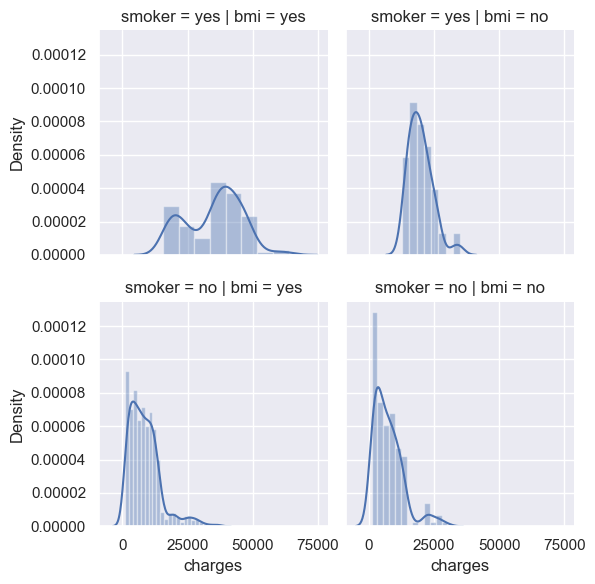

In [80]:
sns.FacetGrid(data=data, row='smoker', col='bmi').map(sns.distplot,'charges')
plt.show()

One hot label encoding method


In [88]:
def OneHotEncoderMethod(indices, data):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),indices )], remainder='passthrough')
    return columnTransformer.fit_transform(data)

Label ENCODING METHOD

In [18]:
def LabelEncoderMethod(series):
    from sklearn import preprocessing
    LE = preprocessing.LabelEncoder()
    return LE.fit_transform(series)

Encoding x features

In [19]:
def EncodingSelection(X, threshold=10):
    # Step 01 : Select the string col
    string_cols = list(np.where((X.dtypes == object))[0])
    one_hot_encoding_indices = []
    
    # Step 02: The number of categoty is 2 and more than threshold, label encode
    for col in string_cols:
        length = len(pd.unique(X[X.columns[col]]))
        if length == 2 or length > threshold:
            X[X.columns[col]] = LabelEncoderMethod(X[X.columns[col]])
        else:
            one_hot_encoding_indices.append(col)
            
    # Step 03: One hot encode otherwise 
    X = OneHotEncoderMethod(one_hot_encoding_indices, X)
    return X

In [89]:
X = EncodingSelection(X)

In [90]:
X.corr()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

# Min Max scaler

In [37]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(X)
scaled_y = sy.fit_transform(Y.values.reshape(data.shape[0],1))

In [10]:
# scaled_x = np.append(scaled_x, X[:,:1],axis=1)

In [29]:
scaled_x.shape

(1338, 3)

Train test split

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(scaled_x,scaled_y, test_size=0.20, random_state=1)

In [24]:
from sklearn.metrics import r2_score

# Optimizers

# SGD

In [25]:
import tensorflow as tf
import numpy as np

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adadelta, Adam, Adagrad, Adamax, Nadam, RMSprop 
from tensorflow.keras.losses import mse

Printing behins here: ----------------
Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 0.3405
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 0.2287
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1927
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1660
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1437
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1245
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1080
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0941
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0823
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0723
Epoch 11/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0635
Epoch 12/100
34/34 [==============================] - 0s 2ms/step - loss: 0.056

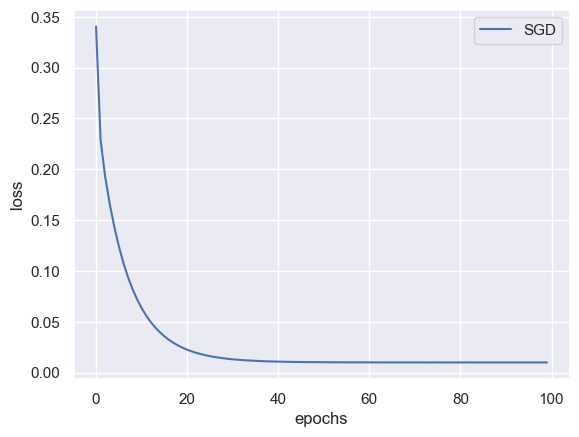

In [40]:
#SGD
# Use the required optimizer to compile the model

model = Sequential()
model.add(Dense(1,activation = 'linear'))
# model.add(Dense(1))

print("Printing behins here: ----------------")
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.0,
    nesterov=False,),loss=tf.keras.losses.mse)
train = model.fit(x_train,y_train,epochs=100)

#loss over time
plt.plot(train.history['loss'], label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['SGD'])
# model.predict(x_test,y_test)

In [32]:
pred = model.predict(x_test)


9/9 [==============================] - 1s 3ms/step


In [20]:
r2_score(y_test,pred) # for all features

-0.35328615947889386

In [33]:
#turn bmi in 0 and 1 form
r2_score(y_test,pred)

0.7355777356168881

In [68]:
r2_score(y_test,pred) # for age bmi smoker

0.6038662866807989

In [73]:
r2_score(y_test,pred)

0.7568036916476395

# KFOLD validation

In [16]:
from sklearn.model_selection import KFold
kf  = KFold(n_splits=5, shuffle = True, random_state= 42)

## SGD function 

In [73]:
def SGD_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(1, activation='linear'))
    # model.add(Ac)
    print("Printing behins here: ----------------")
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.0,
        nesterov=False),loss=tf.keras.losses.mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'] ,label='loss')
    plt.title('SGD')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('12345')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## Mini batch SGD

In [88]:
def MINI_BATCH_SGD_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(1, activation='linear'))
    # model.add(Ac)
    print("Printing behins here: ----------------")
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.0,
        nesterov=False),loss=tf.keras.losses.mse)
    train = model.fit(x_train,y_train,epochs=100, batch_size=20)

    #loss over time
    plt.plot(train.history['loss'] ,label='loss')
    plt.title('SGD')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('12345')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## Momentum

In [38]:
def MOMENTUM_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(1, activation='linear'))
    # model.add(Ac)
    print("Printing behins here: ----------------")
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.2/(1+0.96*100),momentum=0.9,
        nesterov=False),loss=tf.keras.losses.mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'] ,label='loss')
    plt.title('SGD')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('12345')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## Nesterov

In [95]:
def NESTEROV_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(1, activation='linear'))
    # model.add(Ac)
    print("Printing behins here: ----------------")
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,
        nesterov=True),loss=tf.keras.losses.mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'] ,label='loss')
    plt.title('SGD')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('12345')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## RmsProp

In [98]:
def RMSPROP_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(1, activation='linear'))
    # model.add(Ac)
    print("Printing behins here: ----------------")
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, epsilon=1e-8) ,loss=tf.keras.losses.mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'] ,label='loss')
    plt.title('SGD')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['1','2','3','4','5'])
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## ADAM

In [14]:
def ADAM_model(x_train, y_train, x_test, y_test):
    #Creating Sequential Model
    # lr_schedule = keras.optimizers.schedules.l
    print("Printing behins here: ----------------")
    model = Sequential()
    model.add(Dense(1))
    # Use the required optimizer to compile the model
    model.compile(optimizer=Adam(learning_rate=0.2/(1+0.96*100),
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-8,
        amsgrad=False,),loss=mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'],label='loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('Adam')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

Printing behins here: ----------------
Epoch 1/100
34/34 [==============================] - 21s 13ms/step - loss: 665.2834
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 177.6550
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 28.9648
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 2.4798
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1557
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0772
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0657
Epoch 11/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0628
Epoch 12/100
34/34 [==============================] - 0s 1ms/step - loss

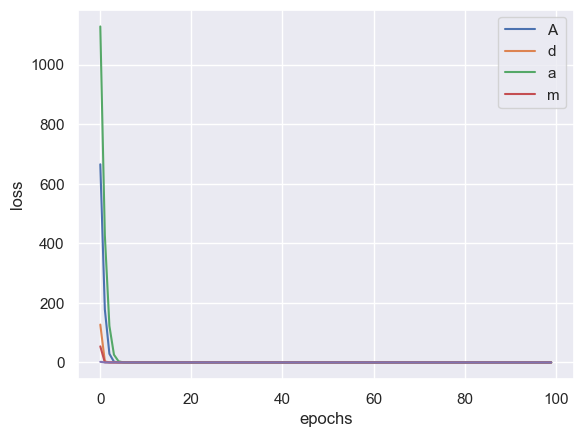

In [17]:
SGD_score  = []
mini_batch_sgd_score= []
momentum_score = []
nesterov_score = []
rms_prop_score = []
ADAM_score = []
for train_index, test_index in kf.split(scaled_x):
    x_train, x_test = scaled_x[train_index], scaled_x[test_index]
    y_train, y_test = scaled_y[train_index], scaled_y[test_index]
    # SGD_score.append(SGD_model(x_train,y_train,x_test,y_test))
    # mini_batch_sgd_score.append(MINI_BATCH_SGD_model(x_train,y_train,x_test,y_test))
    # momentum_score.append(MOMENTUM_model(x_train,y_train,x_test,y_test))
    # nesterov_score.append(NESTEROV_model(x_train,y_train,x_test,y_test))
    # rms_prop_score.append(RMSPROP_model(x_train,y_train,x_test,y_test))
    ADAM_score.append(ADAM_model(x_train,y_train,x_test,y_test))
    

In [76]:
np.mean(SGD_score)

[0.7810509903748457,
 0.7378344073707732,
 0.7679840126164018,
 0.6306667111985713,
 0.7459003067726547]

In [30]:
np.mean(ADAM_score) 
# for 0.001 = alpha

0.6859073461332793

In [34]:
np.mean(ADAM_score)
# for 0.01 = alpha

0.7340598802725693

In [37]:
np.mean(ADAM_score)
# for learning rate decay

0.7379998144367365

In [94]:
np.mean(mini_batch_sgd_score)

0.7395091601511976

In [26]:
np.mean(momentum_score) 
# without decay rate

0.7287750837320033

In [40]:
np.mean(momentum_score)
# with decay rate

0.7377358670796849

In [97]:
np.mean(nesterov_score)

0.7397622437255729

In [100]:
np.mean(rms_prop_score)

0.7280993363428557

In [122]:
np.mean(momentum_score) # for age bmi smoker

0.7375670063487549

In [18]:
np.mean(ADAM_score)

0.6766521126757556

In [10]:

def sigmoid_activation(x):
	# compute the sigmoid activation value for a given input
	return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(x):
	# compute the derivative of the sigmoid function ASSUMING
	# that the input "x" has already been passed through the sigmoid
	# activation function
	return x * (1 - x)

In [11]:
def predict(X, W):
	# take the dot product between our features and weight matrix
	preds = sigmoid_activation(X.dot(W))
	# apply a step function to threshold the outputs to binary
	# class labels
	preds[preds <= 0.5] = 0
	preds[preds > 0] = 1
	# return the predictions
	return preds

In [12]:
def next_batch(X, y, batchSize):
	# loop over our dataset "X" in mini-batches, yielding a tuple of
	# the current batched data and labels
	for i in np.arange(0, X.shape[0], batchSize):
		yield (X[i:i + batchSize], y[i:i + batchSize])

In [13]:
X = np.c_[X, np.ones((X.shape[0]))]

In [14]:
X

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 3., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 1.]])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.20, random_state=1)

In [16]:
# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

[INFO] training...


In [17]:
# construct the argument parse and parse the arguments

import easydict
args = easydict.EasyDict({
        "batch-size": 32,
        "epochs": 100,
        "alpha": 0.01,
})
print(args["epochs"])

100


In [24]:
# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
	# initialize the total loss for the epoch
	epochLoss = []
	# loop over our data in batches
	for (batchX, batchY) in next_batch(x_train, y_train, args["batch-size"]):
		# take the dot product between our current batch of features
		# and the weight matrix, then pass this value through our
		# activation function
		preds = sigmoid_activation(batchX.dot(W))
		print(preds)
		# preds = preds.flatten()
		# now that we have our predictions, we need to determine the
		# "error", which is the difference between our predictions
		# and the true values
		print(preds.shape)
		error = (preds - batchY)
		epochLoss.append(np.sum(error ** 2))
		# the gradient descent update is the dot product between our
		# (1) current batch and (2) the error of the sigmoid
		# derivative of our predictions
		d = error * sigmoid_deriv(preds)
		gradient = batchX.T.dot(d)
		# gradient = gradient.flatten()
		# in the update stage, all we need to do is "nudge" the
		# weight matrix in the negative direction of the gradient
		# (hence the term "gradient descent" by taking a small step
		# towards a set of "more optimal" parameters
		print(args["alpha"])
		W = W+ -args["alpha"] * gradient
		# update our loss history by taking the average loss across all
	# batches
	loss = np.average(epochLoss)
	losses.append(loss)
	# check to see if an update should be displayed
	if epoch == 0 or (epoch + 1) % 5 == 0:
		print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
			loss))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1.

ValueError: operands could not be broadcast together with shapes (32,10) (32,) 